In [1]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegression
from extrapolation import *
from experiments import Experiment

In [2]:
device = "cpu"

X = []
with open("../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [3]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^7$

In [4]:
model = LogisticRegression(X_train, y_train, 1e7, device=device)

In [5]:
model.fit(1e-8, max_iter=100500)

In [21]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5650, dtype=torch.float64)

In [6]:
len(model.log)

6216

In [7]:
experiment = Experiment(model.log, model.obj, 5, values=model.value_log, device=device)

In [8]:
experiment.run_method("RRE+QR", RRE, {"qr": True})

In [9]:
experiment.run_method("RNA", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "normalize": False})

In [10]:
experiment.run_method("RNA+norm", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [11]:
experiment.run_method("RNA+ls", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [12]:
experiment.run_method("RNA+Cholesky", RNA_cholesky, {"lambda_range": (1e-40, 1e-5), "linesearch": False})

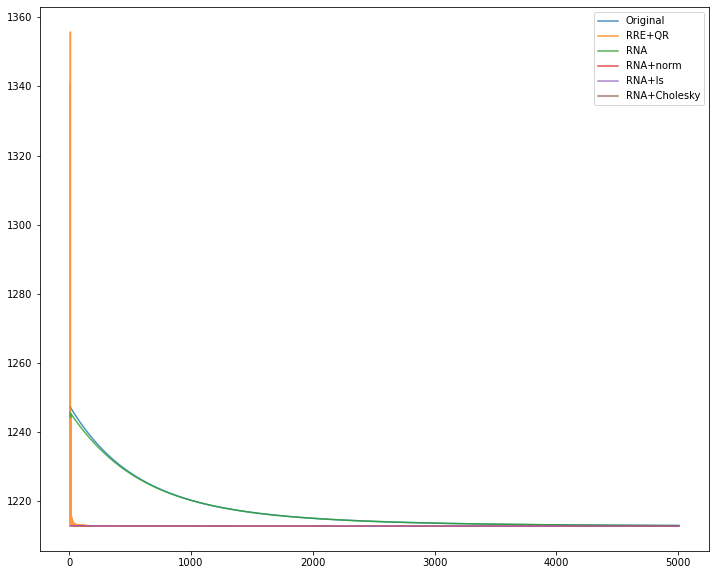

In [19]:
experiment.plot_values(n=5000, figsize=(12, 10))

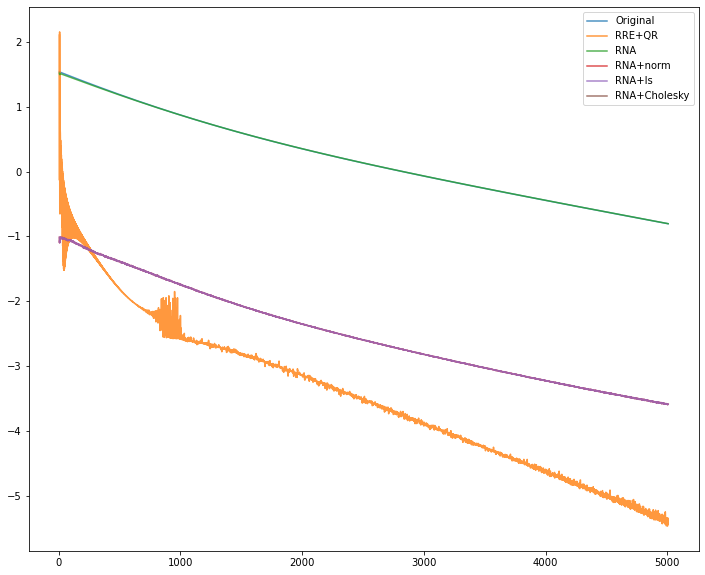

In [20]:
experiment.plot_log_diff(n=5000, figsize=(12, 10))

In [22]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5750, dtype=torch.float64)

$\tau = 10^2$

In [31]:
model = LogisticRegression(X_train, y_train, 1e2, device=device)

In [35]:
model.fit(1e-8, max_iter=100500)

In [36]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [39]:
experiment = Experiment(model.log, model.obj, 5, values=model.value_log, device=device)

In [40]:
experiment.run_method("RRE+QR", RRE, {"qr": True})

In [41]:
experiment.run_method("RNA", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "normalize": False})

In [42]:
experiment.run_method("RNA+norm", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [43]:
experiment.run_method("RNA+ls", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [44]:
experiment.run_method("RNA+Cholesky", RNA_cholesky, {"lambda_range": (1e-40, 1e-5), "linesearch": False})

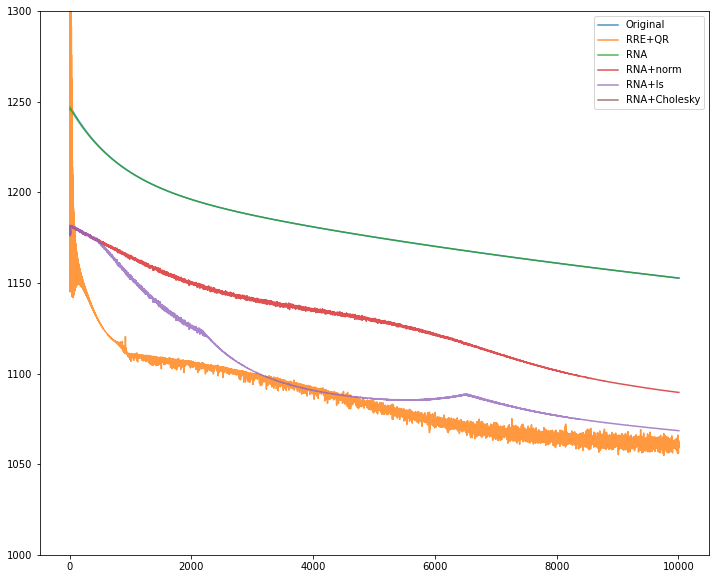

In [52]:
experiment.plot_values(n=10000, figsize=(12, 10), ylim=(1000, 1300))

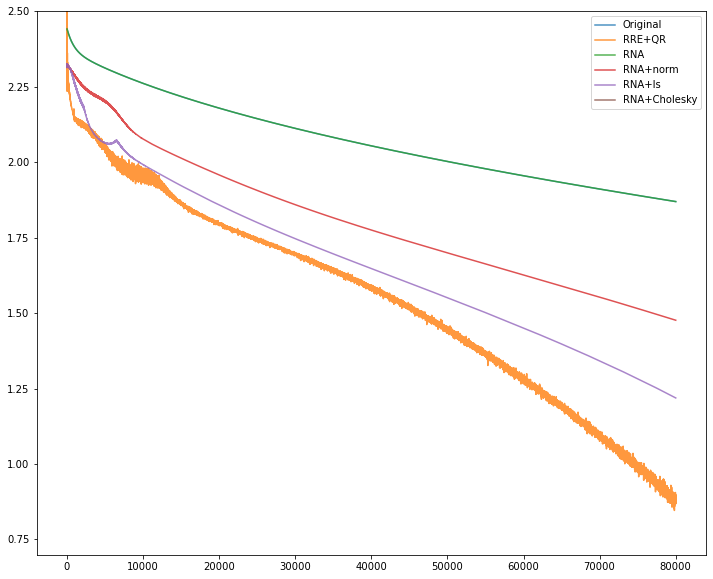

In [50]:
experiment.plot_log_diff(n=80000, figsize=(12, 10), ylim=(None, 2.5))

In [47]:
experiment.save("Madelon_1e2.p")

In [48]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5450, dtype=torch.float64)

$\tau = 10^{-3}$

In [53]:
model = LogisticRegression(X_train, y_train, 1e-3, device=device)

In [54]:
model.fit(1e-8, max_iter=100500)

In [55]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [56]:
experiment = Experiment(model.log, model.obj, 5, values=model.value_log, device=device)

In [57]:
experiment.run_method("RRE+QR", RRE, {"qr": True})

In [58]:
experiment.run_method("RNA", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "normalize": False})

In [59]:
experiment.run_method("RNA+norm", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [60]:
experiment.run_method("RNA+ls", RNA, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [61]:
experiment.run_method("RNA+Cholesky", RNA_cholesky, {"lambda_range": (1e-40, 1e-5), "linesearch": False})

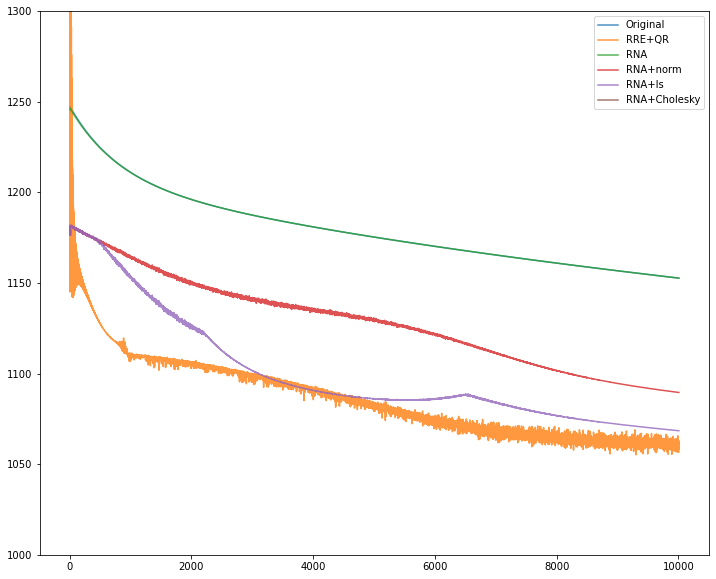

In [62]:
experiment.plot_values(n=10000, figsize=(12, 10), ylim=(1000, 1300))

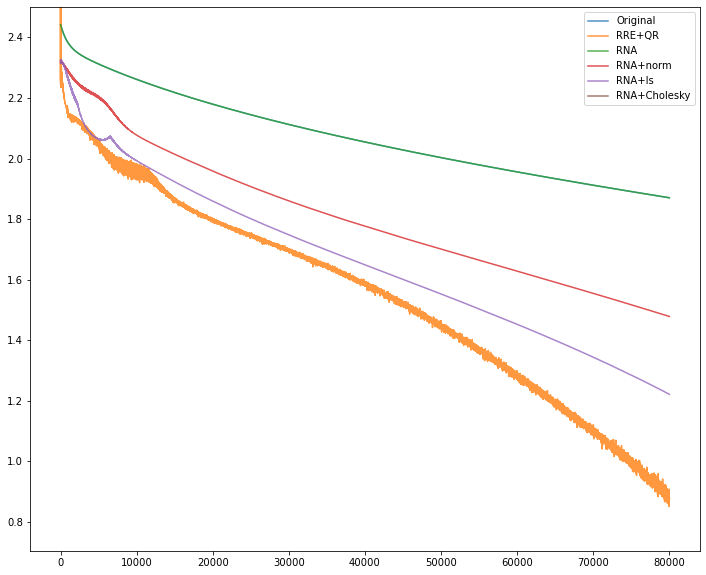

In [63]:
experiment.plot_log_diff(n=80000, figsize=(12, 10), ylim=(None, 2.5))

In [64]:
experiment.save("Madelon_1e-3.p")

In [65]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5450, dtype=torch.float64)